In [1]:
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, poisson
import scipy

# функции для генерации данных

def generate_sample_for_statistic_calculation(size: int = 10000) -> np.ndarray:
    rnd_mean = np.random.normal(5, 5, size=1)[0]
    rnd_std = np.random.poisson(5, size=1)[0]
    return norm(rnd_mean, rnd_std).rvs(size)


def correlation_data() -> Tuple[np.ndarray, np.ndarray]:
    sample1 = norm(0, 1).rvs(1000)
    noise = norm(0, 1).rvs(1000)
    sample2 = np.random.normal(0, 1, size=1)[0] * sample1 + np.random.normal(0, 1, size=1) + noise
    return sample1, sample2


def task3_data() -> np.ndarray:
    if np.random.random() < 0.8:
        return norm(0, 1).rvs(1000)
    else:
        return poisson(5).rvs(1000)
    
    
def task4_part1() -> Tuple[np.ndarray, np.ndarray]:
    rnd_mean1 = np.random.normal(5, 5, size=1)[0]
    rnd_std1 = np.random.poisson(5, size=1)[0]
    
    rnd_mean2 = np.random.normal(5, 5, size=1)[0]
    rnd_std2 = np.random.poisson(5, size=1)[0]
    
    sample1 = norm(rnd_mean1, rnd_std1).rvs(1000)
    sample2 = norm(rnd_mean2, rnd_std2).rvs(1000)
    
    print(f"sample1 mean: {sample1.mean()}")
    print(f"sample2 mean: {sample2.mean()}")

    return sample1, sample2
    

### Задание 1

In [44]:
# Функция generate_sample_for_statistic_calculation() отдает выборку значений некоторого распределения.
# Посчитать общие статистики: 
#    минимум, максимум, медиана, среднее, дисперсия, стандратное отклонение, 0.25 и 0.75 квантили
# Используйте numpy и его функции агрегации.
# Для подсчета квантилей используйте функцию np.quantile(). Аргументы посмотрите в документации.
# Выведите все статистики по очереди на каждой строчке через print. 
# Посмотрите на цифры. Сделайте выводы о том, какие значения может принимать анализируемая случайная величина. 
# Как соотносятся между собой статистики? 
# Например, сильно ли отклоняются минимальные и максимальные значения от среднего?

values = generate_sample_for_statistic_calculation()

Минимум:  -7.390319301608693
Максимум:  14.09589239317725
Среднее:  3.7265867250106086
Медиана:  3.717405561131052
Дисперсия:  8.877714441807576
Стандартное отклонение:  2.9795493689159738
0.25 квантиль:  1.7144080464148357
0.75 квантиль:  5.733725507153096


<Axes: ylabel='Density'>

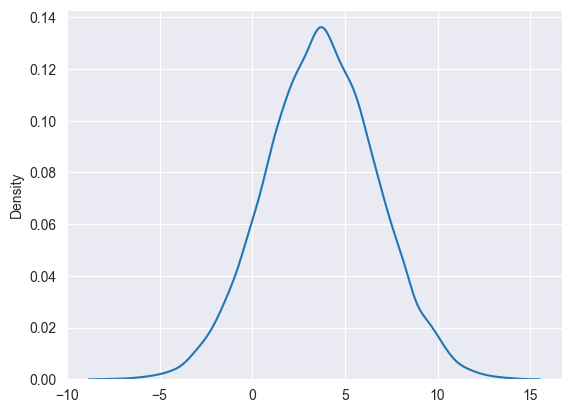

In [45]:
print('Минимум: ', np.min(values))
print('Максимум: ', np.max(values))
print('Среднее: ', np.mean(values))
print('Медиана: ', np.median(values))
print('Дисперсия: ', np.var(values))
print('Стандартное отклонение: ', np.std(values))
print('0.25 квантиль: ', np.quantile(values, 0.25))
print('0.75 квантиль: ', np.quantile(values, 0.75))

import seaborn as sns
sns.kdeplot(values)

### Задание 2

In [ ]:
# Корреляция
# Корреляция показывает линейную зависимость между величинами и может принимать значения от -1 до 1.
# 1 и -1 показывают сильную корреляцию. Значение близкое к нулю показывает то, что корреляции почти нет.
# Напишите функцию корреляции с помощью модуля numpy.
# Функция принимает 2 выборки. И возвращает одно число.
# Сравните по времени (функция %%timeit) работу вашей функции и функции np.corrcoef() модуля numpy

# Формула для расчет корреляции ниже:

## $corr(x,y) = \frac{\sum_i^N{(x_i-\bar{x}) (y_i-\bar{y})}}{N * std(x) * std(y)}$

#### $\sum - знак \, суммирования \, по \, членам \, вектора$
#### $std - стандартное \, отклонение$
#### $\bar{x} - среднее \, вектора$

In [9]:
sample1, sample2 = correlation_data()

def correlation(x,y):
    return  sum((x - np.mean(x))*(y - np.mean(y))) / (len(x) * np.std(x) * np.std(y))

correlation(sample1, sample2) - np.corrcoef(sample1, sample2)[0,1] < 0.00001

True

In [10]:
sample1, sample2 = correlation_data()
correlation(sample1,sample2)

-0.4076026950967568

In [13]:
sample1, sample2 = correlation_data()
np.corrcoef(sample1,sample2)

array([[ 1.        , -0.90321654],
       [-0.90321654,  1.        ]])

### Задание 3

In [ ]:
# Код генерирует данные, которые вы должны проверить на нормальность распределения.
# Напишите код, который это выполняет.
# Определите нулевую гипотезу и альтернативную.
# Задайте уровень значимости.
# проведите тест и сделайте выводы на его основе.
# выведи вс нужные для принятия решения результаты на экран

In [5]:
values = task3_data()

# Исходя из материала лекции, для проверки распределения величины на нормальность можно использовать критерий Шапиро-Уилк. В этом случае гипотезы выглядят следующим образом:
# H0 - величина имеет нормальное распределение
# H1 - величина не имеет нормального распределения
# alpha = 0.05

from scipy.stats import shapiro
import seaborn as sns

stat, p_value = shapiro(values)
print("p_value:", p_value)

p_value: 0.3168462812900543


<Axes: ylabel='Density'>

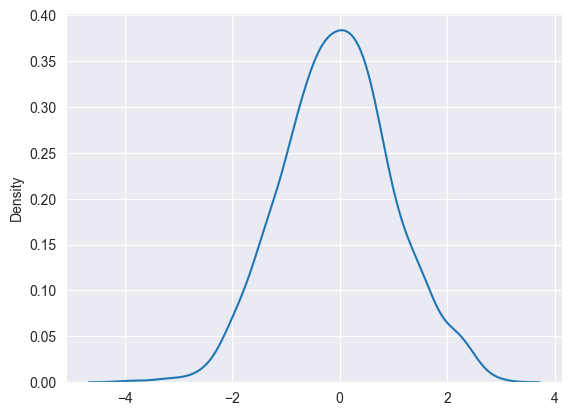

In [6]:
# При многократном запуске кода в предыдущей ячейке значение p_value получается > alpha, а это означает, что мы не отвергаем
# нулевую гипотезу (т.к. отвергаем мы ее при p_value < alpha). Значит, можно сделать вывод, Что величина имеет нормальное распределение

sns.kdeplot(values)

### Задание 4

#### Подзадание 1

In [ ]:
# проведите ttest на двух множествах (используйте ttest_ind метод из scipy.stats)
# выберите уровень значимости.
# определите нулевую и и альтернативную гипотезы.
# получите p_value. Определите прокрасился ли тест или нет.
# сделайте выводы.
# выводите все нужные для анализа результаты на экран

sample1 mean: 6.37800893754798
sample2 mean: 7.506053420216015
p_value: 7.411515910918834e-23
Различия есть (тест прокрашен)


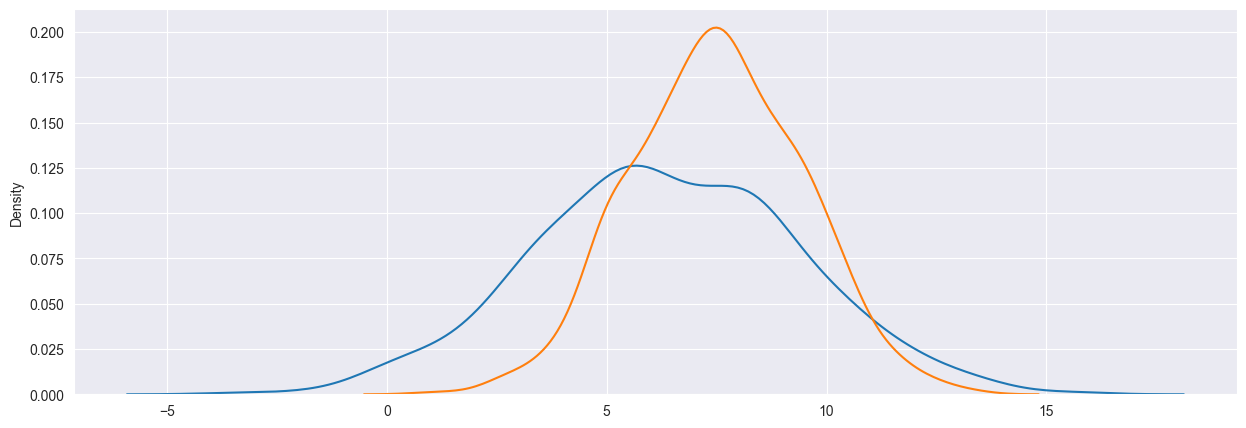

In [16]:
sample1, sample2 = task4_part1()

# Исходя из материала лекции в случае с ttest гипотезы выглядят следующим образом:
# H0 - различий между значениями нет
# H1 - различия есть
alpha = 0.05
# решающее правило: если p_value < alpha, то есть основания отбросить H0 (т.е. считать, что отличия есть / тест прокрасился)
import seaborn as sns
from scipy.stats import ttest_ind

plt.figure(figsize=(15, 5))
plt.plot()
sns.kdeplot(sample1)
sns.kdeplot(sample2)

stat, p_value = ttest_ind(sample1, sample2)
print("p_value:", p_value)
print("Различия есть (тест прокрашен)" if p_value< alpha else "Различий нет" )

#### подзадание 2

In [ ]:
# Подбрасывали игральную кость. Делали это 1000 раз. Получили следующие показания.
# Вопрос: является ли кость симметричной? То есть любая грань может выпасть одинаковое кол-во раз?
# возьмите функцию chisquare из scipy.stats и проведи проверку.
# выберите уровень значимости.
# определите нулевую и и альтернативную гипотезы.
# получите p_value. Определите прокрасился ли тест или нет.
# сделайте выводы.

# После выводов проделайте следующее:
# Как должны были выпасть грани, чтобы тест показал противоположный результат? Запишите получившийся вариант

$$
\begin{aligned}
&\begin{array}{cccc}
\hline Ребро & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline Кол-во \, выпаданий & 150 & 153 & 166 & 170 & 183 & 178 \\
\hline
\end{array}
\end{aligned}
$$

In [5]:
# Тест chisquare позволяет сравнить два набора частота реализации фиксированного числа событий (например, выпадения 1-й грани игральной кости, 2-й, 3-й и т.д. до 6й)
# и сделать вывод о том, совпадении или различии этих частот. С помощью этого теста мы можем сравнить фактические частоты выпадение граней игральной кости с ожидаемыми 
# частотами для идеально симметричной игральной кости

# В этом случае гипотезы формулируются таким образом:
# H0 - частоты одинаковы (различий нет)
# H1 - частоты отличаются (различия есть)
alpha = 0.05
# решающее правило: если p_value < alpha, то есть основания отбросить H0 (т.е. считать, что частоты отличаются)

# поскольку частоты выпадания граней идеально симметричной кости должны быть равны, то соответствующая случайная величина имеет равномерное распределение
# в этом случае набор ее ожидаемых значений можно не передавать в chisquare, т.к. по умолчанию эта функция как раз сравнивает переданные частоты с частотами 
# равномерной сл.величины

from scipy.stats import chisquare
stat, p_value = chisquare(np.array([150,153,166,170,183,178]))
print("p_value:", p_value)
print("Игральная кость не является идеально симметричной" if p_value< alpha else "Игральная кость идеально симметрична" )

p_value: 0.38869326976390334
Игральная кость идеально симметрично


In [6]:
# для того, чтобы получить обратный результат теста, нужно взять более отличающиеся частоты выпадания граней
stat, p_value = chisquare(np.array([140,143,156,160,173,228]))
print("p_value:", p_value)
print("Игральная кость не является идеально симметричной" if p_value< alpha else "Игральная кость идеально симметрична" )

p_value: 7.851636455899903e-06
Игральная кость не является идеально симметричной


### Задание 5

In [ ]:
# Интегрирование. 
# Напишите функцию, которая определена на интервале от -10 до 10. 
# Функция на ваше усмотрение.
# Посчитайте интеграл (площадь под кривой) вашей функции.
# Проверьте себя либо аналитическим расчетом интеграла, либо воспользовавшись сервисом 
# https://www.integral-calculator.ru/

In [ ]:
from scipy import integrate
import matplotlib.pyplot as plt

Интеграл функции y = x^3 + 1 на интервале (-10, 10) равен: 20.00000000000057


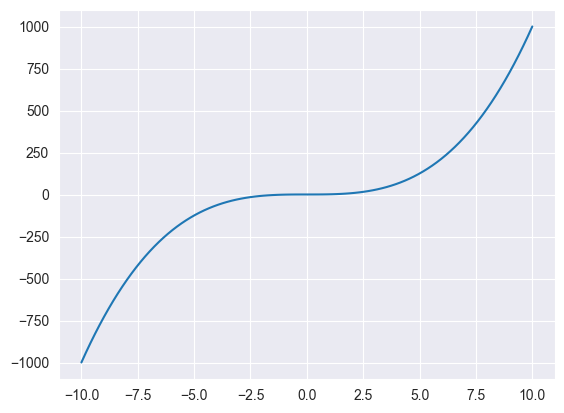

In [8]:
x = np.linspace(-10, 10, 100)
y = x ** 3 + 1

plt.plot(x, y)

#расчет интеграла
s = 0
for i in range(1, len(x)): 
    s+= (x[i] - x[i-1])*((y[i-1]+y[i])/2)

print ('Интеграл функции y = x^3 + 1 на интервале (-10, 10) равен:', s)

## $\int_{-10}^{10} x^3 + 1$ =  $\frac{x^4}{4} + х  |_{-10}^{10} $ = $\frac{1000}{4} + 10 - \frac{1000}{4} + 10$ = $20$

### Задание 6

In [ ]:
# Решите задачу интерполирования.
# У вас есть конечное число точек. Постройте на них функцию, которую хочется.
# Проведите на ней процедуру интерполяции. 
# Проверьте либо руками, либо с помощью питона результат работы вашей интерполяции 
# результат и выводы выведи на экран.

In [1]:
from scipy import interpolate

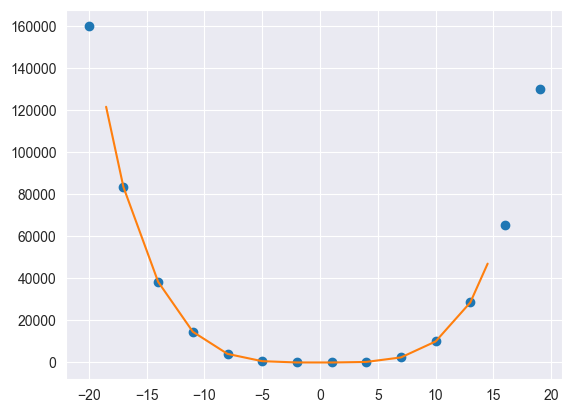

In [3]:
# на заданном наборе x строим значения y и рисуем в виде точек (подсмотрел в ноутбуке с лекции)
x = np.arange(-20, 20, 3)
y = x**4 + x 

plt.plot(x, y, 'o')

# выполняем интерполяцию и получаем функцию f
f = interpolate.interp1d(x, y)

# задаем другой набор точек и получаем значения интерполированной функции на них, после чего рисуем на графике в виде отрезков
x1 = np.arange(-18.5, 15, 0.5)
y1 = f(x1)
plt.plot(x1, y1, '-')
